In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 9
mpl.rcParams["axes.titlesize"] = 10
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)
print('Successful!')

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.2
Successful!


Evaluating TS.......... 5.2 seconds
Regret: 41.60 +/- 8.15 (median: 31.50, max: 87.00, min: 7.00)
Evaluating HS-SampleWithReplacement.......... 93.9 seconds
Regret: 90.30 +/- 21.35 (median: 69.50, max: 286.00, min: 41.00)
Evaluating Non-Parametric TS.......... 18.9 seconds
Regret: 130.50 +/- 15.81 (median: 115.50, max: 261.00, min: 64.00)
Evaluating SSMC.......... 64.1 seconds
Regret: 108.00 +/- 9.33 (median: 110.00, max: 168.00, min: 52.00)


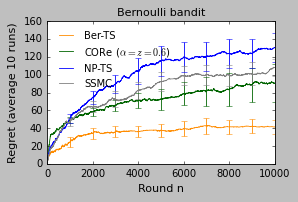

In [2]:
import datetime

algs = [
    
    ("TS", {}, "darkorange", "-", r"Ber-TS"),
#     ("GaussTS", {"sigma": 0.2}, "red", "-", r"Gauss-TS ($\sigma = 0.2$)"),
#     ("GaussTS", {"sigma": 0.6}, "purple", "-", r"Gauss-TS ($\sigma = 0.6$)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "bernoulli"}, "darkorange", "-", 
#          r"Ber-PHE ($a = 0.5$)"),
#     ("PHE", {"a": 0.2, "pseudo_reward": "Gauss"}, "darkorange", "-", 
#            r"Gauss-PHE ($a = 0.2$)"),
#     ("PHE", {"a": 0.9, "pseudo_reward": "Gauss"}, "gold", "-", "Gauss-PHE (a = 0.9)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.6, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha = z = 0.6$)"),
#     ("HS_SWR_scale", {"sample_portion": 0.4, 'z': 0.4}, "darkorange", "-", 
#            r"CORe ($\alpha = z = 0.4$)"),
#     ("HS_SWR_scale", {"sample_portion": 0.5, 'z': 0.5}, "black", "-", 
#            r"CORe ($\alpha = z = 0.5)"),
#     ("UCB1", {}, "cyan", "-", "UCB1"),
#     ("UCBV", {}, "gray", "-", "UCB-V"),
#     ("HS_SWR", {"sample_portion": 0.6, 'z': 0.6}, "black", "-", 
#            "HS_SWR (a:0.6,z:0.6)"),
#     ("HS_SWR", {"sample_portion": 1.0, 'z': 0.6}, "blue", "-", 
#            "HS_SWR (a:1.0,z:0.6)"),
  #   ("HS_SWR_MirrorPool", {"sample_portion": 0.5}, "black", "-", 
  #            "HS_SWR_mirror (sample_portion = 0.5)"),
#     ("MNomialTS", {"M":2}, "blue", "-", r"NP-TS ($M = 2$)"),
    ("NonParaTS", {}, "blue", "-", r"NP-TS"),
    ("SSMC", {}, "gray", "-", r"SSMC"),
]
num_runs = 10
n = 10000
K = 10
noise = 'ber'

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  env = []
  for run in range(num_runs):
#     mu = np.random.rand(K)
    mu = 0.5 * np.random.rand(K) + 0.25
    if noise == 'ber':
        env.append(BerBandit(mu))
    elif noise == 'beta':
        env.append(BetaBandit(mu))
    elif noise == 'gauss':
        env.append(GaussBandit(mu, sigma=0.2))

#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=1.5))
#     elif fig == 1:
#       env.append(BetaBandit(mu))
#     else:
#       env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=2)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) 
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2.5)

    alg_num += 1

  if fig == 0:
    if noise == 'ber':
        plt.title("Bernoulli bandit")
    elif noise == 'beta':
        plt.title("Beta bandit")
    elif noise == 'gauss':
        plt.title(r"Gaussian bandit, $\sigma = 0.2$")
    
  plt.xlabel("Round n",size=10)
#   plt.ylim(bottom=1, top=1000)
#   plt.yscale("log")

  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
  if fig <= 2:
    plt.legend(loc="best", frameon=False)
#   plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../aistats_exp_results/compare_baselines_meanrange05_{}_{}_{}_{}_{}.pdf". \
          format(noise, now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Gaussian TS.................................................................................................... 3.2 seconds
Regret: 109.03 +/- 16.62 (median: 37.05, max: 730.75, min: -86.33)
Evaluating PHE.................................................................................................... 6.7 seconds
Regret: 87.51 +/- 12.42 (median: 38.98, max: 591.27, min: -25.65)
Evaluating HS-SampleWithReplacement.................................................................................................... 96.7 seconds
Regret: 94.72 +/- 8.42 (median: 70.47, max: 703.57, min: 30.49)
Evaluating UCB1.................................................................................................... 3.7 seconds
Regret: 454.33 +/- 7.45 (median: 459.26, max: 630.62, min: 166.62)
Evaluating UCB-V.................................................................................................... 5.7 seconds
Regret: 780.77 +/- 11.99 (median: 808.56, max: 972.00, min: 377.35)


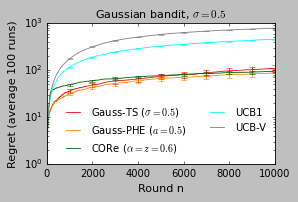

In [20]:
import datetime

algs = [
    
#     ("TS", {}, "red", "-", r"Ber-TS"),
    ("GaussTS", {"sigma": 0.2}, "red", "-", r"Gauss-TS ($\sigma = 0.5$)"),
#     ("GaussTS", {"sigma": 0.6}, "purple", "-", r"Gauss-TS ($\sigma = 0.6$)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "bernoulli"}, "darkorange", "-", 
#          r"Ber-PHE ($a = 0.5$)"),
    ("PHE", {"a": 0.2, "pseudo_reward": "Gauss"}, "darkorange", "-", 
           r"Gauss-PHE ($a = 0.5$)"),
#     ("PHE", {"a": 0.9, "pseudo_reward": "Gauss"}, "gold", "-", "Gauss-PHE (a = 0.9)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.6, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha = z = 0.6$)"),
    ("UCB1", {}, "cyan", "-", "UCB1"),
    ("UCBV", {}, "gray", "-", "UCB-V"),
#     ("HS_SWR", {"sample_portion": 0.6, 'z': 0.6}, "black", "-", 
#            "HS_SWR (a:0.6,z:0.6)"),
#     ("HS_SWR", {"sample_portion": 1.0, 'z': 0.6}, "blue", "-", 
#            "HS_SWR (a:1.0,z:0.6)"),
  #   ("HS_SWR_MirrorPool", {"sample_portion": 0.5}, "black", "-", 
  #            "HS_SWR_mirror (sample_portion = 0.5)"),
]
num_runs = 100
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
#     env.append(BerBandit(mu))
#     env.append(BetaBandit(mu))
    env.append(GaussBandit(mu, sigma=0.5))

#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=1.5))
#     elif fig == 1:
#       env.append(BetaBandit(mu))
#     else:
#       env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) # if alg_num // 3 == fig or alg[0]=='GaussTS' else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2.5)

    alg_num += 1

  if fig == 0:
#     plt.title("Bernoulli bandit")
#     plt.title("Beta bandit")
    plt.title(r"Gaussian bandit, $\sigma = 0.5$")
    
  plt.xlabel("Round n",size=10)
  plt.ylim(bottom=1, top=1000)
  plt.yscale("log")

  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
  if fig <= 2:
    plt.legend(loc="lower right", ncol=2, frameon=False)
#   plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../aistats_exp_results/compare_baselines_gauss_{}_{}_{}_{}.pdf". \
          format(now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Gaussian TS.................................................................................................... 3.7 seconds
Regret: 512.45 +/- 60.36 (median: 216.35, max: 2111.61, min: -1.09)
Evaluating Gaussian TS.................................................................................................... 3.6 seconds
Regret: 271.57 +/- 19.80 (median: 186.43, max: 831.89, min: -23.26)
Evaluating PHE.................................................................................................... 6.4 seconds
Regret: 400.02 +/- 55.04 (median: 232.19, max: 4237.43, min: -52.95)
Evaluating PHE.................................................................................................... 5.8 seconds
Regret: 210.90 +/- 21.05 (median: 127.62, max: 1344.41, min: -8.24)
Evaluating HS-SampleWithReplacement.................................................................................................... 101.9 seconds
Regret: 225.91 +/- 18.25 (median: 170.37, max: 915.11

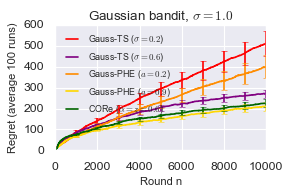

In [9]:
import datetime

algs = [
    
#     ("TS", {}, "red", "-", r"Ber-TS"),
    ("GaussTS", {"sigma": 0.2}, "red", "-", r"Gauss-TS ($\sigma = 0.2$)"),
    ("GaussTS", {"sigma": 0.6}, "purple", "-", r"Gauss-TS ($\sigma = 0.6$)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "bernoulli"}, "darkorange", "-", 
#          r"Ber-PHE ($a = 0.5$)"),
    ("PHE", {"a": 0.2, "pseudo_reward": "Gauss"}, "darkorange", "-", 
           r"Gauss-PHE ($a = 0.2$)"),
    ("PHE", {"a": 0.9, "pseudo_reward": "Gauss"}, "gold", "-", r"Gauss-PHE ($a = 0.9$)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.6, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha = z = 0.6$)"),
#     ("UCB1", {}, "cyan", "-", "UCB1"),
#     ("UCBV", {}, "gray", "-", "UCB-V"),
]
num_runs = 100
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
#     env.append(BerBandit(mu))
#     env.append(BetaBandit(mu))
    env.append(GaussBandit(mu, sigma=1.0))

#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=1.5))
#     elif fig == 1:
#       env.append(BetaBandit(mu))
#     else:
#       env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) # if alg_num // 3 == fig or alg[0]=='GaussTS' else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2.5)

    alg_num += 1

  if fig == 0:
#     plt.title("Bernoulli bandit")
#     plt.title("Beta bandit")
    plt.title(r"Gaussian bandit, $\sigma = 1.0$")
    
  plt.xlabel("Round n",size=10)
  plt.ylim(bottom=0)
#   plt.yscale("log")

  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
  if fig <= 2:
    plt.legend(loc="upper left", ncol=1, frameon=False, fontsize=8)
#   plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

plt.tight_layout()

# now = datetime.datetime.now()
# with open("../aistats_exp_results/compare_baselines_gauss_cross1_{}_{}_{}_{}.pdf". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

In [29]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import datetime

# uniform_data = np.random.rand(10, 12)
zlabels = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
alphalabels = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
alphalabels = alphalabels[::-1]

# ax = sns.heatmap(uniform_data, xticklabels=xticklabels)
z_length = int(len(zlabels))
a_length = int(len(alphalabels))

regret_mtx = np.zeros((a_length, z_length))

num_runs = 52
n = 10000
K = 10

plt.figure(figsize=(4, 4))
algs = ['HS_SWR_scale']
colors = {'HS_SWR_scale':'darkgreen'}

for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu,sigma=1.0))

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for i, sample_portion in enumerate(alphalabels):
        for j, init_var in enumerate(zlabels):
            print("init_var: ", init_var, " alpha: ", sample_portion)
#             sample_portion = np.sqrt(alphasquare)
            regret, _ = evaluate_parallel(alg_class, 
                {"sample_portion": sample_portion, "z": init_var}, env, n, num_process=13)
            cum_regret = regret.sum(axis=0)
#             regret_means.append(cum_regret.mean())
#             regret_vars.append(cum_regret.std()/np.sqrt(num_runs))
            
            regret_mtx[i,j] = int(cum_regret.mean())

#     plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), color='darkgreen',
#              label=r'CORe: $\alpha^2z=0.2$')
#     plt.errorbar(x_axis, regret_means, regret_vars, ecolor='darkgreen', fmt="none")
#     plt.xticks(x_axis, init_var_labels)
  ax = sns.heatmap(regret_mtx, 
                   xticklabels=zlabels, yticklabels=alphalabels)
  plt.title(r"Gaussian bandit, $\sigma = 1.0$")
  plt.xlabel(r"Initial variance ratio $z$",size=10)
  plt.ylabel(r"Scaling ratio $\alpha$",size=10)

plt.tight_layout()
now = datetime.datetime.now()
with open("../aistats_exp_results/core_tune_gauss_{}_{}_{}_{}.pdf" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()


init_var:  0.2  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 53.7 seconds
Regret: 382.61 +/- 14.57 (median: 387.52, max: 850.94, min: 116.37)
init_var:  0.3  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 50.8 seconds
Regret: 380.08 +/- 14.85 (median: 383.87, max: 573.09, min: 143.26)
init_var:  0.4  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 51.2 seconds
Regret: 416.66 +/- 14.01 (median: 387.45, max: 757.64, min: 235.12)
init_var:  0.5  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 53.3 seconds
Regret: 393.15 +/- 13.43 (median: 371.98, max: 673.79, min: 158.85)
init_var:  0.6  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 50.1 seconds
Regret: 400.87 +/- 14.04 (median: 390.96, max: 620.62, min: 172.80)
init_var:  0.7 

Evaluating HS-SampleWithReplacement.......................... 25.7 seconds
Regret: 297.81 +/- 50.44 (median: 177.87, max: 1197.44, min: 77.32)
Evaluating HS-SampleWithReplacement.......................... 27.3 seconds
Regret: 440.29 +/- 91.65 (median: 184.55, max: 1785.02, min: 46.49)
Evaluating HS-SampleWithReplacement.......................... 27.6 seconds
Regret: 242.90 +/- 55.94 (median: 140.09, max: 1133.82, min: -114.08)
Evaluating HS-SampleWithReplacement.......................... 27.4 seconds
Regret: 225.94 +/- 68.40 (median: 111.91, max: 1442.22, min: -152.43)


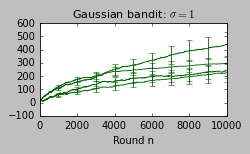

In [19]:
import datetime

algs = [
#     ("UCBV", {}, "gray", "-", "UCB-V"),
#     ("UCB1", {}, "cyan", "-", "UCB1"),
#     ("GaussTS", {"sigma":0.2}, "red", "-", "TS"),
#     ("GaussTS", {"sigma":0.5}, "red", "-", "TS"),
#     ("PHE", {"a": 0.2, "pseudo_reward": "bernoulli"}, "darkorange", "-", "PHE (a = 0.2)"),
#     ("PHE", {"a": 1.2, "pseudo_reward": "Gauss"}, "darkorange", "-", "PHE (a = 1.2)"),
#     ("PHE", {"a": 1.0, "pseudo_reward": "Gauss"}, "gold", "-", "PHE (a = 1.0)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "Gauss"}, "red", "-", "PHE (a = 0.5)"),
    ("HS_SWR_scale", {"sample_portion": 0.5, 'z': 0.5}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.5, z = 0.5)"),
    ("HS_SWR_scale", {"sample_portion": 0.4, 'z': 0.5}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.4, z = 0.5)"),
    ("HS_SWR_scale", {"sample_portion": 0.5, 'z': 0.4}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.5, z = 0.4)"),
    ("HS_SWR_scale", {"sample_portion": 0.4, 'z': 0.4}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.4, z = 0.4)"),
]

num_runs = 26
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.2, 2))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu,sigma=1))
#       env.append(BetaBandit(mu))

  plt.subplot(1, 1, fig + 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]))
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title(r"Gaussian bandit: $\sigma=1$")
    
#   plt.ylim(0, 400)
  plt.xlabel("Round n")
#   if not fig:
#     plt.ylabel("Regret (average {} runs)".format(num_runs))
#   if fig <= 2:
#     plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
# with open("../aistats_exp_results/compare_baselines_{}_{}_{}_{}.jpeg". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Gaussian TS.......... 1.0 seconds
Regret: 46.49 +/- 4.28 (median: 47.56, max: 61.25, min: 14.82)
Evaluating PHE.......... 2.1 seconds
Regret: 69.22 +/- 5.34 (median: 65.11, max: 108.63, min: 43.06)
Evaluating HS-SampleWithReplacement.......... 67.8 seconds
Regret: 16.36 +/- 3.23 (median: 12.77, max: 44.78, min: 7.57)


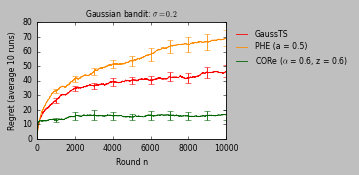

In [51]:
import datetime

algs = [
#     ("GaussTS", {"crs":2.5}, "purple", "-", "GaussTS"),
#     ("PHE", {"a": 0.2}, "gold", "-", "PHE (a = 0.2)"),
    ("GaussTS", {"crs":2.}, "red", "-", "GaussTS"),
    ("PHE", {"a": 0.2}, "darkorange", "-", "PHE (a = 0.5)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.2, 'z': 0.4}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.6, z = 0.6)"),
]

num_runs = 10
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(4.5, 2.2))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu, sigma=0.2))

  plt.subplot(1, 1, fig + 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=2)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4])
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title(r"Gaussian bandit: $\sigma=0.2$")
    
#   plt.ylim(0, 400)
  plt.xlabel("Round n")
  plt.ylabel("Regret (average {} runs)".format(num_runs))
  plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

#   if not fig:
#     plt.ylabel("Regret (average {} runs)".format(num_runs))
#   if fig <= 2:
#     plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
# with open("../aistats_exp_results/compare_baselines_gauss_{}_{}_{}_{}.jpeg". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

In [ ]:
import datetime

algs = [
    ("UCBV", {}, "gray", "-", "UCB-V"),
    ("UCB1", {}, "cyan", "-", "UCB1"),
    ("GaussTS", {"crs":1.2}, "red", "-", "TS"),
    ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR", {"sample_portion": 0.4, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.4, z = 0.6)"),
]

num_runs = 100
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.2, 2))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]))
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title(r"Gaussian bandit: $\sigma=0.5$")
  elif fig == 1:
    plt.title("Beta bandit")
  else:
    plt.title("Gaussian bandit")
  plt.ylim(0, 400)
  plt.xlabel("Round n")
#   if not fig:
#     plt.ylabel("Regret (average {} runs)".format(num_runs))
#   if fig <= 2:
#     plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
# with open("../aistats_exp_results/compare_baselines_{}_{}_{}_{}.jpeg". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

  5: 0.19 0.86 |   6: 0.17 0.76 |  49: 0.18 0.76 |  28: 0.08 0.78 |  40: 0.19 0.76 |  29: 0.12 0.81 |  44: 0.20 0.82 |  44: 0.06 0.87 |  41: 0.16 0.82 |  26: 0.11 0.85 | 
 21: 0.06 0.84 |   2: 0.19 0.90 |  43: 0.10 0.80 |  20: 0.13 0.88 |  29: 0.16 0.82 |  23: 0.27 0.87 |   5: 0.16 0.94 |  47: 0.06 0.85 |  30: 0.18 0.84 |  46: 0.10 0.84 | 
 26: 0.18 0.82 |  23: 0.12 0.78 |  47: 0.25 0.88 |   1: 0.24 0.84 |  22: 0.08 0.87 |  46: 0.18 0.78 |  28: 0.16 0.83 |  48: 0.15 0.93 |  30: 0.12 0.86 |   7: 0.16 0.80 | 
 21: 0.26 0.86 |  39: 0.18 0.89 |  28: 0.12 0.82 |  43: 0.09 0.86 |   2: 0.26 0.87 |  32: 0.18 0.78 |  19: 0.07 0.79 |  46: 0.09 0.85 |  14: 0.10 0.81 |  46: 0.12 0.86 | 
  7: 0.11 0.76 |   0: 0.19 0.78 |  18: 0.17 0.82 |   8: 0.15 0.76 |   3: 0.20 0.89 |  29: 0.16 0.88 |  17: 0.20 0.77 |  15: 0.07 0.88 |  38: 0.10 0.89 |  16: 0.14 0.83 | 
 26: 0.15 0.92 |  49: 0.15 0.87 |  35: 0.22 0.92 |  25: 0.17 0.88 |  20: 0.09 0.77 |  33: 0.17 0.81 |   3: 0.15 0.85 |  19: 0.16 0.84 |  37: 0.24

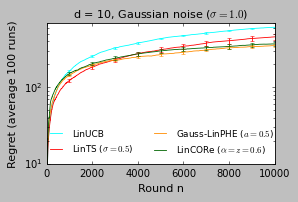

In [4]:
import datetime

reward_noise = "normal"
reward_sigma = 1.0

algs = [
  ("LinUCB", {}, "cyan", "-", "LinUCB"),
#   ("LinTS", {"sigma":0.6}, "red", "-", "LinTS"),
    ("LinTS", {"sigma":0.5}, "red", "-", r"LinTS ($\sigma=0.5$)"),
#     ("LinTS", {"sigma":0.9}, "red", "-", "LinTS"),
#   ("LinGreedy", {}, "blue", "-", "$\\varepsilon$-greedy"),
  #("LinPHE", {"a": 2}, "red", "-", "LinPHE (a = 2)"),
  #("LinPHE", {"a": 1}, "darkorange", "-", "LinPHE (a = 1)"),
  ("LinPHE", {"a": 0.5}, "darkorange", "-", r"Gauss-LinPHE ($a = 0.5$)"),
#     ("LinPHE", {"a": 1}, "darkorange", "-", "LinPHE (a = 0.5)"),
#     ("LinPHE", {"a": 1.5}, "darkorange", "-", "LinPHE (a = 0.5)"),
  #("LinHistorySwap", {"swap_prob": 0.05}, "cyan", "-", "LinHS (swap_prob=0.05)"),
  #("LinHistorySwap", {"swap_prob": 0.1}, "darkgreen", "-", "LinHS (swap_prob=0.1)"),
  #("LinHistorySwap", {"swap_prob": 0.15}, "magenta", "-", "LinHS (swap_prob=0.15)"),
  #("LinHistorySwap", {"swap_prob": 0.2}, "cyan", "-", "LinHS (swap_prob=0.2)"),
#    ("LinHS_SWR", {"sample_portion": 0.5}, "cyan", "-", "LinHS_SWR (swap_prob=0.5)"),
  ("LinHS_SWR_scale", {"sample_portion": 0.6, "z":0.6}, "darkgreen", "-", 
                       r"LinCORe ($\alpha = z = 0.6$)"),
]
num_runs = 100
n = 10000
K = 50

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  if fig == 0:
    d = 10
  elif fig == 1:
    d = 10
  else:
    d = 20

  env = []
  for run in range(num_runs):
    # standard d-dimensional basis (with a bias term)
    basis = np.eye(d)
    basis[:, -1] = 1

    # arm features in a unit (d - 2)-sphere
    X = np.random.randn(K, d - 1)
    X /= np.sqrt(np.square(X).sum(axis=1))[:, np.newaxis]
    X = np.hstack((X, np.ones((K, 1))))  # bias term
    X[: basis.shape[0], :] = basis

    # parameter vector in a (d - 2)-sphere with radius 0.5
    theta = np.random.randn(d - 1)
    theta *= 0.5 / np.sqrt(np.square(theta).sum())
    theta = np.append(theta, [0.5])

    # create environment
    env.append(LinBandit(X, theta, reward_noise, sigma=reward_sigma))
    print("%3d: %.2f %.2f | " % (env[-1].best_arm,
      env[-1].mu.min(), env[-1].mu.max()), end="")
    if (run + 1) % 10 == 0:
      print()

  plt.subplot(1, 1, fig + 1)
  # plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = eval(alg[0])

#     fname = "%s/lin_d=%d_%d_%s.npy" % \
#       (current_dir, d, alg_num, alg[0].lower())
#     if not os.path.exists(fname):
#       regret, _ = evaluate(alg_class, alg[1], env, n)
#       with open(fname, "wb") as f:
#         np.save(f, regret)
#     with open(fname, "rb") as f:
#       regret = np.load(f)

    if d < 14:
        regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)
    else:
        regret, _ = evaluate(alg_class, alg[1], env, n)

    cum_regret = regret.cumsum(axis=0)
    std_regret = cum_regret.std(axis=1) / np.sqrt(cum_regret.shape[1])
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) # if alg_num // 3 == fig else None)
#     plt.fill_between(step,
#       cum_regret.mean(axis=1) - std_regret,
#       cum_regret.mean(axis=1) + std_regret,
#       color=alg[2], alpha=0.1, linewidth=0)

    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2)

    alg_num += 1

#   plt.title(r"Beta linear bandit")
  plt.title(r"d = %d, Gaussian noise ($\sigma = %.1f$) " % (d, reward_sigma))
  plt.xlabel("Round n",size=10)
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
#   plt.ylim(0, 400)
  plt.ylim(bottom=10)
  plt.yscale("log")
  if fig <= 1:
    plt.legend(loc="lower right", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../aistats_exp_results/compare_baselines_linear_{}_{}_{}_{}_{}.pdf". \
          format(reward_noise, now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()